## Evaluate Exercise (Regression Unit)
### Corey Solitaire
#### 9/31/2020

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt


import warnings
warnings.filterwarnings('ignore')

*****

Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the **python script** and **jupyter notebook** both with the name **evaluate** within your regression-exercises repo.

*****

1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


*****

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

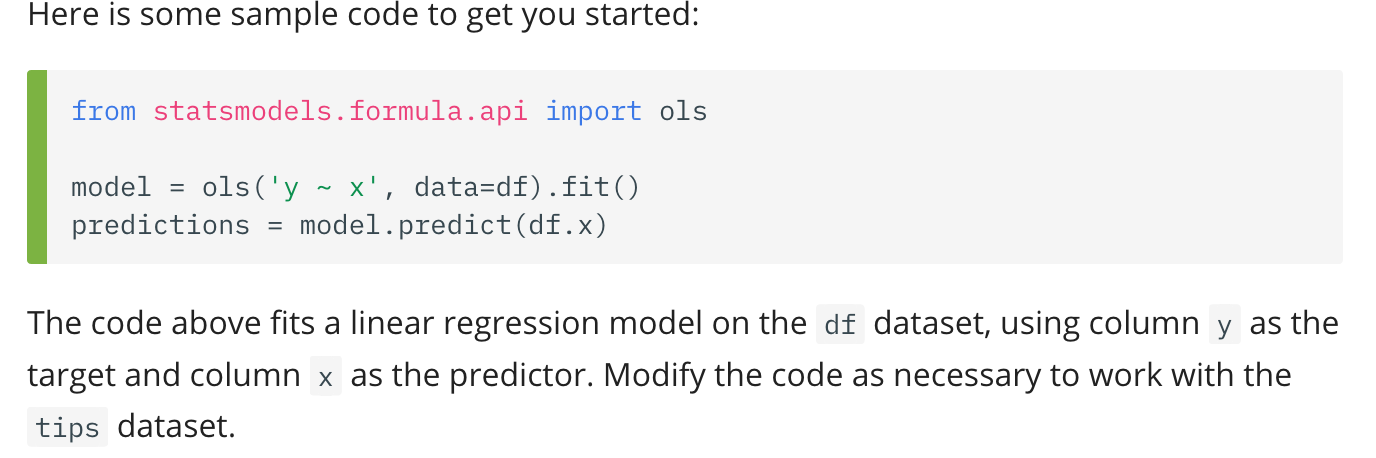

In [8]:
# Build Model
model = ols('tip ~ total_bill', data=df).fit()
# Estabolish Baseline and add to df
df['yhat_baseline'] = df['total_bill'].mean()
# Compute predictions and add to original dataframe
df['yhat'] = model.predict(df.total_bill)
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,19.785943,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,19.785943,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,19.785943,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,19.785943,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,19.785943,3.502822


*****

3. Plot the residuals for the linear regression model that you made.

In [10]:
# compute residuals
df['residual'] = df['yhat'] - df['tip']
df['residual_baseline'] = df['yhat_baseline'] - df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,19.785943,2.704636,1.694636,18.775943
1,10.34,1.66,Male,No,Sun,Dinner,3,19.785943,2.006223,0.346223,18.125943
2,21.01,3.50,Male,No,Sun,Dinner,3,19.785943,3.126835,-0.373165,16.285943
3,23.68,3.31,Male,No,Sun,Dinner,2,19.785943,3.407250,0.097250,16.475943
4,24.59,3.61,Female,No,Sun,Dinner,4,19.785943,3.502822,-0.107178,16.175943


4. **Calculate** the sum of squared errors, **explain** sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Sum of Squares:

Total Sum of Squares:

Meand Standard Error:

Root Mean Squared Error:

*****

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model significantly better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.
    - plot_residuals(y, yhat): creates a residual plot
    - regression_errors(y, yhat): returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
    - model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.